# Multi-Layer Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
class MLP:
    
    def __init__(self, shape, alpha):
        self.shape = shape
        self.network_size = len(shape) - 1
        self.init_weights()
        self.alpha = alpha
        
    def init_weights(self):
        bias = []
        weights = []
        for i in range(0, self.network_size):        
            weights.append(np.random.normal(size=(self.shape[i+1],self.shape[i])))
            bias.append(np.random.normal(size=self.shape[i+1]))
        self.w = weights
        self.b = bias

    def linear_function(self, x, index):
        return np.dot(x,self.w[index].T) + self.b[index]
    
    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    @staticmethod
    def dsigmoid(z):
        return z*(1 - z)
    
    @staticmethod
    def net_error(tar, out):
        return np.mean(np.power(tar - out, 2))
    
    def activation_function(self, x, index):
        linear_f = self.linear_function(x, index)
        return self.sigmoid(linear_f)
    
    def feed_forward(self, x):
        self.a = []
        
        for i in range(self.network_size):
            if i == 0:
                z = np.dot(x, self.w[i].T) + self.b[i]
            else:
                z = np.dot(self.a[i-1], self.w[i].T) + self.b[i]
                
            self.a.append(self.sigmoid(z))
        
        return self.a[-1]
    
    def bp(self, x, target):
        # Error calculs
        err = []
        _x = np.reshape(x, (len(x),1))

        for i in reversed(range(self.network_size)):
            dsig = self.dsigmoid(self.a[i])
            if i == self.network_size - 1:
                delta = -(target - self.a[i])
                err.append(delta*dsig)
            else: 
                err.append(np.dot(err[-1], self.w[i+1])*dsig)
                
        err = err[::-1]
             
        for i in range(self.network_size):
            if i == 0:
                _err = np.reshape(err[i], (len(err[i]), 1))
                self.w[i] = self.w[i] - self.alpha * np.dot(_err, _x.T)
                self.b[i] = self.b[i] - self.alpha * err[i]
            else:
                _err = np.reshape(err[i], (len(err[i]), 1))
                _a = np.reshape(self.a[i-1], (len(self.a[i-1]),1))
                self.w[i] = self.w[i] - self.alpha * np.dot(_err, _a.T)
                self.b[i] = self.b[i] - self.alpha * err[i]
            
    def train(self, epochs, train_inputs, train_outputs):
        train_err = []
        
        for epoch in range(epochs):
            count = 0
            err = 0
                
            for x in train_inputs:
                out = self.feed_forward(x)
                
                err += self.net_error(train_outputs[count],out)
                self.bp(x, train_outputs[count])
                
                count += 1
                
            train_err.append(err/train_inputs.shape[0])
                
        return train_err
    
    def predict(self, test_input, test_output):
        out = self.feed_forward(test_input)
        print("prediction : ")
        print(self.a[-1])
        print("target : ")
        print(test_output)
        print("error : ")
        print(self.net_error(test_output, out))
        
    def test(self, test_inputs, test_outputs):
        test_err = []
        count = 0
        err = 0
                
        for x in test_inputs:
            out = self.feed_forward(x)

            test_err.append(self.net_error(test_outputs[count],out))

            count += 1

#         test_err.append(err/test_inputs.shape[0])
                
        return test_err

In [3]:
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('BP algorithm')
    plt.show()
    
def graph_test_error(err_vector):
    mean = [np.mean(err_vector)]*len(err_vector)
    plt.figure(0)
    plt.plot(err_vector)
    plt.plot(mean, label='Mean', linestyle='--')
    plt.xlabel('inputs')
    plt.ylabel('Error')
    plt.title('test error')
    plt.show()

# XOR learning

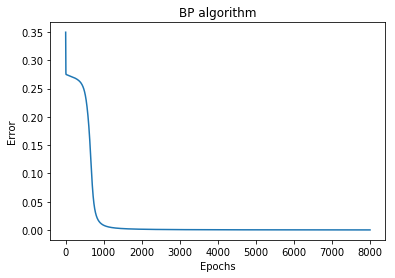

In [4]:
mlp = MLP([2,3,3,1], 0.5)
target = np.array([[0], [1], [1], [0]])
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
err = mlp.train(8000, inputs, target)
graph_error(err)

# Iris dataset learning

In [5]:
def get_dataset():
    f = open("./iris_data/iris.data")
    
    lines = f.readlines()
    f.close()
    
    np.random.shuffle(lines)
    input = []
    output = []
    training_set = {}
    testing_set = {}
    for line in lines:
        if(len(line) > 1):
            x_0, x_1, x_2, x_3, y = line.replace('\n','').split(',')
            input.append([float(x_0),float(x_1),float(x_2),float(x_3)])
            
            if y == 'Iris-setosa':
                output.append([1,0,0])
            if y == 'Iris-versicolor':
                output.append([0,1,0])
            if y == 'Iris-virginica':
                output.append([0,0,1])
            
            training_set = {
                'input': np.array(input[0:120]),
                'output': np.array(output[0:120])
            }
            
            testing_set =  {
                'input': np.array(input[121:151]),
                'output': np.array(output[121:151])
            }
            
    return (training_set, testing_set)

In [6]:
iris_mlp = MLP([4,10,10,10,10,10,3], 0.05)
training_set, testing_set = get_dataset()

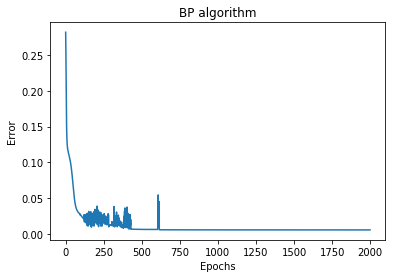

In [7]:
err = iris_mlp.train(2000, training_set['input'], training_set['output'])
graph_error(err)

# Random prediction

In [8]:
iris_mlp.predict(testing_set['input'][1], testing_set['output'][1])

prediction : 
[9.92249022e-01 7.54075855e-03 6.59997201e-04]
target : 
[1 0 0]
error : 
3.912543361749378e-05


# Test error

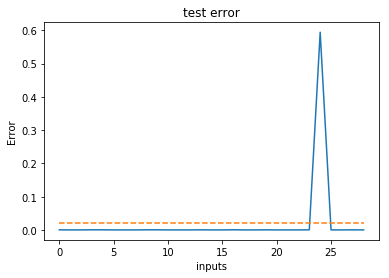

In [9]:
test_err = iris_mlp.test(testing_set['input'], testing_set['output'])
graph_test_error(test_err)